# 多线程

## 1. 什么是线程和进程

**进程：** (Process，有时被称为重量级进程）是程序的一次执行。每个进程都有自己的地址空间、内存、数据栈以及记录运行轨迹的辅助数据，操作系统管理运行的所有进程，并为这些进程公平分配时间。进程可以通过fork和spawn操作完成其他任务。因为各个进程有自己的内存空间、数据栈等，所以只能使用进程间通信（Inter Process Communication,IPC），而不能直接共享信息。

**线程:** （Thread，有时被称为轻量级进程）跟进程有些相似，不同的是所有线程运行在同一个进程中，共享运行环境。线程有开始、顺序执行和结束3部分，有一个自己的指令指针，记录运行到什么地方。线程的运行可能被抢占（中断）或暂时被挂起（睡眠），从而让其他线程运行，这叫作让步。一个进程中的各个线程之间共享同一块数据空间，所以线程之间可以比进程之间更方便地共享数据和相互通信。

**多线程与多进程：** 一个任务就是一个进程，开启多个任务就是**多进程**。有些进程不止可以同时做一件事，比如Word可以同时打字、检查拼写、打印等。在一个进程内部，要同时做多件事，就需要同时运行多个线程。**多线程**类似于同时执行多个不同的程序，多线程运行有以下3个优点：
- （1）使用线程可以把占据长时间的任务放到后台去处理。
- （2）用户界面可以更加吸引人，比如用户单击一个按钮，用于触发某些事件的处理，可以弹出一个进度条显示处理的进度。
- （3）程序的运行速度可能加快。

## 2. 使用线程

### 2.1 \_thread 模块（已经不推荐使用）

Python调用_thread模块中的start_new_thread()函数产生新线程。_thread的语法如下：

【参数解析】:<br>
- function为线程函数；
- args为传递给线程函数的参数，必须是tuple类型；
- kwargs为可选参数。

In [5]:
# 实例

import _thread
import time

# 为线程定义一个函数
def show_time(threadName, delay):
    count =0 
    while count < 5:
        time.sleep(delay)
        count += 1
        print("%s : %s" %(threadName, time.ctime(time.time()) ) )
        
# 调用_thread.start_new_thread（）函数创建线程
try:
    _thread.start_new_thread(show_time,("线程1",2,))
    _thread.start_new_thread(show_time,("线程2",3,))
except:
    print("Error:无法启动线程")

线程1 : Tue Mar 24 10:41:18 2020
线程2 : Tue Mar 24 10:41:19 2020
线程1 : Tue Mar 24 10:41:20 2020
线程2 : Tue Mar 24 10:41:22 2020
线程1 : Tue Mar 24 10:41:22 2020
线程1 : Tue Mar 24 10:41:24 2020
线程2 : Tue Mar 24 10:41:25 2020
线程1 : Tue Mar 24 10:41:26 2020
线程2 : Tue Mar 24 10:41:28 2020
线程2 : Tue Mar 24 10:41:31 2020


### 2.2 threading 模块

threading 模块除了包含 _thread 模块中的所有方法外，还提供的其他方法：
- threading.currentThread(): 返回当前的线程变量。
- threading.enumerate(): 返回一个包含正在运行的线程的list。正在运行指线程启动后、结束前，不包括启动前和终止后的线程。
- threading.activeCount(): 返回正在运行的线程数量，与len(threading.enumerate())有相同的结果。

除了使用方法外，该线程模块同样提供了Thread类来处理线程，Thread类提供了以下方法:
- run(): 用以表示线程活动的方法。
- start():启动线程活动。
- join([time]): 等待至线程中止。这阻塞调用线程直至线程的join() 方法被调用中止-正常退出或者抛出未处理的异常-或者是可选的超时发生。
- isAlive(): 返回线程是否活动的。
- getName(): 返回线程名。
- setName(): 设置线程名。

In [17]:
# 实例
import threading
import time

exitFlag = 0
  
class TestThread(threading.Thread):  #测试线程类继承Thread类
    
    def __init__(self, threadID, name, counter):   #构造方法
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter
    def run(self):
        print("线程开始：" + self.name)
        show_time(self.name, self.counter, 5)
        print("线程结束：" + self.name)


def show_time(threadName, delay, counter):
    while counter:
        if exitFlag:
            threadName.exit()
        time.sleep(delay)
        print ("%s: %s" % (threadName, time.ctime(time.time())))
        counter -= 1
              
        
        
# 创建线程
thread1 = TestThread(1,"线程1", 1)
thread2 = TestThread(2,"线程2", 2)
 
# 开启新线程
thread1.start()
thread2.start()
 
thread1.join()
thread2.join()

print ("退出主线程")

线程开始：线程1
线程开始：线程2
线程1: Tue Mar 24 11:15:15 2020
线程1: Tue Mar 24 11:15:16 2020
线程2: Tue Mar 24 11:15:16 2020
线程1: Tue Mar 24 11:15:17 2020
线程1: Tue Mar 24 11:15:18 2020线程2: Tue Mar 24 11:15:18 2020

线程1: Tue Mar 24 11:15:19 2020
线程结束：线程1
线程2: Tue Mar 24 11:15:20 2020
线程2: Tue Mar 24 11:15:22 2020
线程2: Tue Mar 24 11:15:24 2020
线程结束：线程2
退出主线程


Thread是一个很有用的同步特性。所有线程都创建之后，再一起调用start()函数启动，而不是每创建一个线程就启动。而且不用管理一堆锁的状态（分配锁、获得锁、释放锁、检查锁的状态等），只要简单对每个线程调用join()主线程，等待子线程结束即可。join()还可以设置timeout参数，即主线程的超时时间。

### 2.3 线程同步

In [3]:
# 线程不同步
import threading
import time

list_data = ["0","0","0","0","0","0","0"]
      
class myThread1 (threading.Thread):
   
    def __init__(self, threadID, name, counter):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter
    def run(self): 
        i = 0
        print ("开启线程： " + self.name)
        set_data(self.name, self.counter, 7, i)
        
class myThread2(threading.Thread):
    def __init__(self, threadID, name, counter):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter
    def run(self):
        print ("开启线程： " + self.name)
        print_data(self.name, self.counter, 7)
              
        
        
def print_data(threadName, delay, counter ):
    while counter:
        time.sleep(delay)
        print(f"{threadName}: {time.ctime(time.time())}:打印数据:{list_data}")
        counter -= 1
        
def set_data(threadName, delay, counter,i):

    while counter:
        time.sleep(delay)
        #print ("%s: %s" % (threadName, time.ctime(time.time())) )
        list_data[i] = '1'
        i += 1
        print(f"{threadName}: {time.ctime(time.time())}:修改第{i}个数据")
        counter -= 1

threadLock = threading.Lock()
threads = []

# 创建新线程
thread1 = myThread1(1, "线程1", 1)
thread2 = myThread2(2, "线程2", 2)

# 开启新线程
thread1.start()
thread2.start()

# 添加线程到线程列表
threads.append(thread1)
threads.append(thread2)

# 等待所有线程完成
for t in threads:
    t.join()
print ("退出主线程")

开启线程： 线程1
开启线程： 线程2
线程1: Tue Mar 24 12:33:48 2020:修改第1个数据
线程2: Tue Mar 24 12:33:49 2020:打印数据:['1', '0', '0', '0', '0', '0', '0']
线程1: Tue Mar 24 12:33:49 2020:修改第2个数据
线程1: Tue Mar 24 12:33:50 2020:修改第3个数据
线程2: Tue Mar 24 12:33:51 2020:打印数据:['1', '1', '1', '0', '0', '0', '0']
线程1: Tue Mar 24 12:33:51 2020:修改第4个数据
线程1: Tue Mar 24 12:33:52 2020:修改第5个数据
线程2: Tue Mar 24 12:33:53 2020:打印数据:['1', '1', '1', '1', '1', '0', '0']
线程1: Tue Mar 24 12:33:53 2020:修改第6个数据
线程1: Tue Mar 24 12:33:54 2020:修改第7个数据
线程2: Tue Mar 24 12:33:55 2020:打印数据:['1', '1', '1', '1', '1', '1', '1']
线程2: Tue Mar 24 12:33:57 2020:打印数据:['1', '1', '1', '1', '1', '1', '1']
线程2: Tue Mar 24 12:33:59 2020:打印数据:['1', '1', '1', '1', '1', '1', '1']
线程2: Tue Mar 24 12:34:01 2020:打印数据:['1', '1', '1', '1', '1', '1', '1']
退出主线程


In [4]:
# 线程同步
import threading
import time

list_data = ["0","0","0","0","0","0","0"]
      
class myThread1 (threading.Thread):
   
    def __init__(self, threadID, name, counter):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter
    def run(self): 
        i = 0
        print ("开启线程： " + self.name)
        # 获取锁，用于线程同步
        threadLock.acquire()
        set_data(self.name, self.counter, 7, i)
        # 释放锁，开启下一个线程    
        threadLock.release()
        
        
class myThread2(threading.Thread):
    def __init__(self, threadID, name, counter):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter
    def run(self):
        print ("开启线程： " + self.name)
        # 获取锁，用于线程同步
        threadLock.acquire()
        print_data(self.name, self.counter, 7)
        # 释放锁，开启下一个线程    
        threadLock.release()
        
def print_data(threadName, delay, counter ):
    while counter:
        time.sleep(delay)
        print(f"{threadName}: {time.ctime(time.time())}:打印数据:{list_data}")
        counter -= 1
        
def set_data(threadName, delay, counter,i):

    while counter:
        time.sleep(delay)
        #print ("%s: %s" % (threadName, time.ctime(time.time())) )
        list_data[i] = '1'
        i += 1
        print(f"{threadName}: {time.ctime(time.time())}:修改第{i}个数据")
        counter -= 1

threadLock = threading.Lock()
threads = []

# 创建新线程
thread1 = myThread1(1, "线程1", 1)
thread2 = myThread2(2, "线程2", 2)

# 开启新线程
thread1.start()
thread2.start()

# 添加线程到线程列表
threads.append(thread1)
threads.append(thread2)

# 等待所有线程完成
for t in threads:
    t.join()
print ("退出主线程")

开启线程： 线程1
开启线程： 线程2
线程1: Tue Mar 24 12:35:33 2020:修改第1个数据
线程1: Tue Mar 24 12:35:34 2020:修改第2个数据
线程1: Tue Mar 24 12:35:35 2020:修改第3个数据
线程1: Tue Mar 24 12:35:36 2020:修改第4个数据
线程1: Tue Mar 24 12:35:37 2020:修改第5个数据
线程1: Tue Mar 24 12:35:38 2020:修改第6个数据
线程1: Tue Mar 24 12:35:39 2020:修改第7个数据
线程2: Tue Mar 24 12:35:41 2020:打印数据:['1', '1', '1', '1', '1', '1', '1']
线程2: Tue Mar 24 12:35:43 2020:打印数据:['1', '1', '1', '1', '1', '1', '1']
线程2: Tue Mar 24 12:35:45 2020:打印数据:['1', '1', '1', '1', '1', '1', '1']
线程2: Tue Mar 24 12:35:47 2020:打印数据:['1', '1', '1', '1', '1', '1', '1']
线程2: Tue Mar 24 12:35:49 2020:打印数据:['1', '1', '1', '1', '1', '1', '1']
线程2: Tue Mar 24 12:35:51 2020:打印数据:['1', '1', '1', '1', '1', '1', '1']
线程2: Tue Mar 24 12:35:53 2020:打印数据:['1', '1', '1', '1', '1', '1', '1']
退出主线程


### 2.4 Queue 模块

Python 的 Queue 模块中提供了同步的、线程安全的队列类，包括FIFO（先入先出)队列Queue，LIFO（后入先出）队列LifoQueue，和优先级队列 PriorityQueue。这些队列都实现了锁原语，能够在多线程中直接使用，可以使用队列来实现线程间的同步。<br><br>
**<center>Queue 模块中的常用方法</center>**

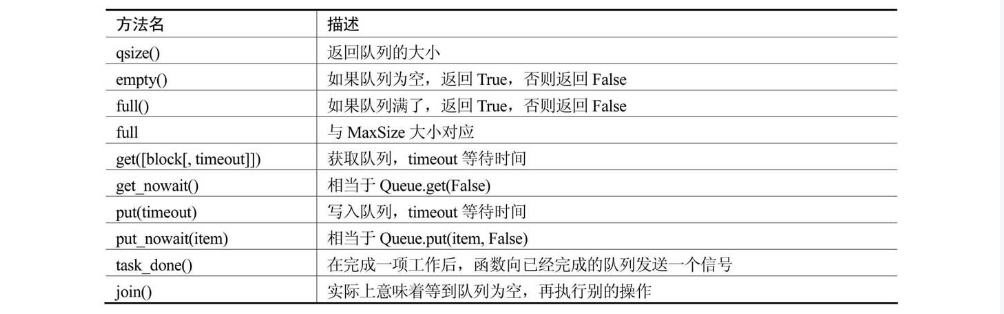

In [18]:
import queue
import threading
import time

exitFlag = 0

class myThread (threading.Thread):
    def __init__(self, threadID, name, q):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.q = q
    def run(self):
        print ("开启线程：" + self.name)
        process_data(self.name, self.q)
        print ( self.name + "：退出线程")

def process_data(threadName, q):
    while not exitFlag:
        queueLock.acquire()
        if not workQueue.empty():
            data = q.get()
            queueLock.release()
            print ("%s 运行： %s" % (threadName, data))
        else:
            queueLock.release()
        time.sleep(2)

threadList = ["线程1", "线程2", "线程3","线程4","线程5"]
nameList = ["One", "Two", "Three", "Four", "Five"]
queueLock = threading.Lock()
workQueue = queue.Queue(10)
threads = []
threadID = 1

# 创建新线程
for tName in threadList:
    thread = myThread(threadID, tName, workQueue)
    thread.start()
    threads.append(thread)
    threadID += 1

# 填充队列
queueLock.acquire()
for word in nameList:
    workQueue.put(word)
queueLock.release()

# 等待队列清空
while not workQueue.empty():
    pass

# 通知线程是时候退出
exitFlag = 1

# 等待所有线程完成
for t in threads:
    t.join()
print ("退出主线程")

开启线程：线程1
开启线程：线程2
开启线程：线程3
开启线程：线程4
开启线程：线程5
线程5 运行： One
线程2 运行： Two线程4 运行： Three
线程3 运行： Four

线程1 运行： Five
线程5：退出线程
线程4：退出线程线程1：退出线程
线程3：退出线程线程2：退出线程


退出主线程


## 3. 多线程在爬虫中的应用

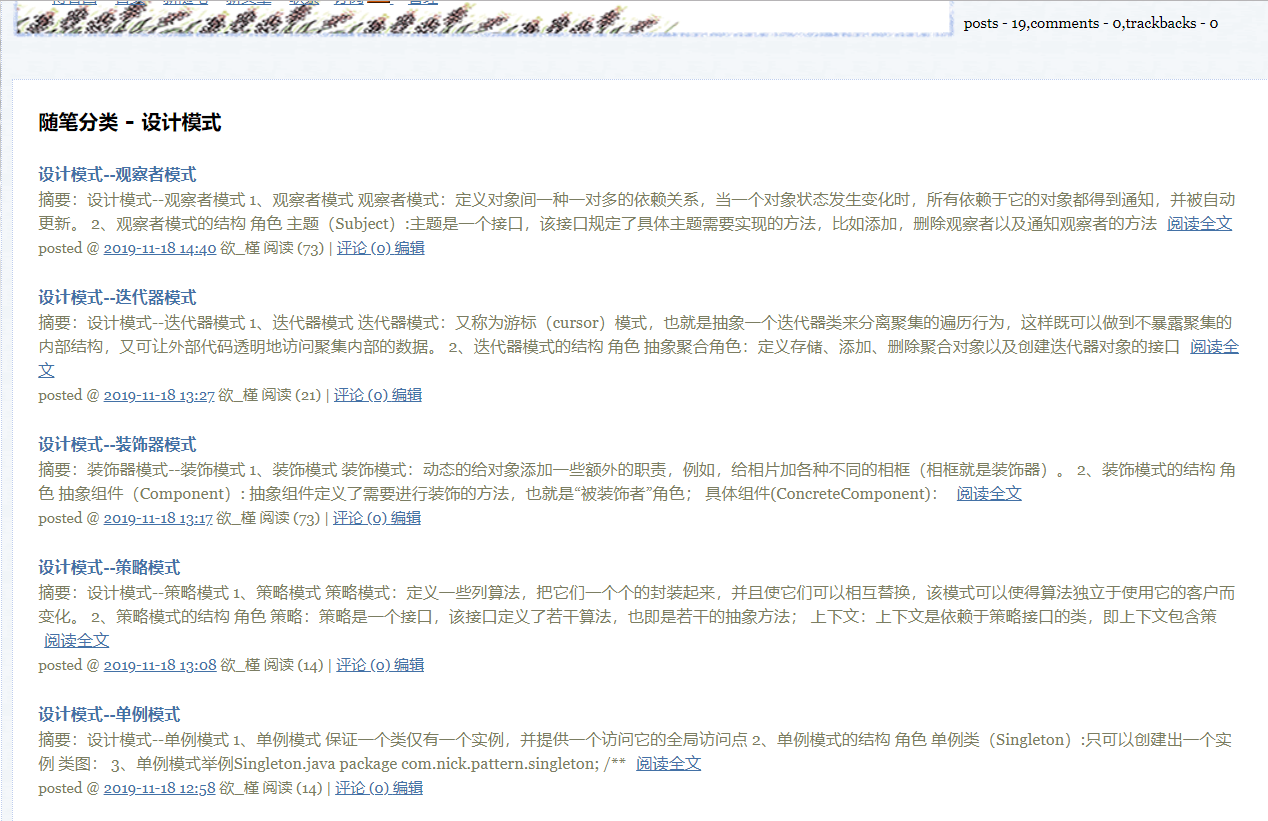

In [25]:
import threading, queue, time
import requests
BASE_URL = "https://www.cnblogs.com/sinlearn/p/"

URL_QUEUE = queue.Queue()
html_lists = ["11881430","11881452","11881469","11881506","11882048"]
for html_list in html_lists:
    url = BASE_URL + html_list + ".html"
    URL_QUEUE.put(url)
    
def Crawler(url_queue):
    while True:
        try:
            #不阻塞的读取队列里的数据
            url_var = url_queue.get_nowait()
            url_queue.qsize()
        except Exception as e:
            break
        curr_thread_name = threading.currentThread().name
        print(f"Current Thread name: {curr_thread_name}, Url: {url_var}")
        
        try:
            html = requests.get(url).content.decode('utf-8')    
            for html_list in html_lists:
                with open('C:/Users/ASUS/Desktop/pythonfiletest/blog/' + html_list + '.html', 'w',encoding='utf-8') as f:                
                    f.write(html)
        except Exception as ex:
            print(f"爬取错误: {ex}")
            continue
   
        
if __name__ == "__main__":
    print("主程序开始。")
    start_time = time.time()        
    threads = []
    
    #可以调节线程数， 进而控制抓取速度
    print("调用线程，开始爬虫。")
    thread_num = 1
    for num in range(0,thread_num):
        thread = threading.Thread(target=Crawler, args=(URL_QUEUE,))
        threads.append(thread)
    for item_t in threads:
        item_t.start()
    for thread_t in threads:
        thread_t.join()
        
    print(f"All thread done, spend: {(time.time() - start_time)} s")

主程序开始。
调用线程，开始爬虫。
Current Thread name: Thread-75, Url: https://www.cnblogs.com/sinlearn/p/11881430.html
Current Thread name: Thread-75, Url: https://www.cnblogs.com/sinlearn/p/11881452.html
Current Thread name: Thread-75, Url: https://www.cnblogs.com/sinlearn/p/11881469.html
Current Thread name: Thread-75, Url: https://www.cnblogs.com/sinlearn/p/11881506.html
Current Thread name: Thread-75, Url: https://www.cnblogs.com/sinlearn/p/11882048.html
All thread done, spend: 1.974358081817627 s


**单个线程:**
 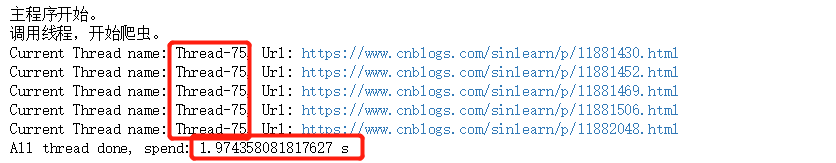

**爬取结果:**
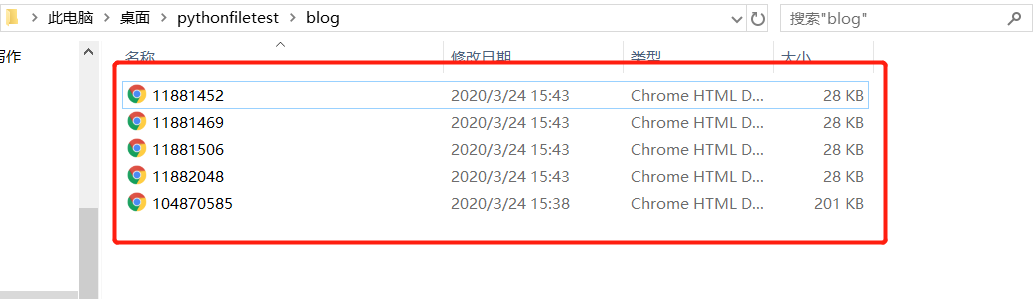

In [26]:
import threading, queue, time
import requests
BASE_URL = "https://www.cnblogs.com/sinlearn/p/"

URL_QUEUE = queue.Queue()
html_lists = ["11881430","11881452","11881469","11881506","11882048"]
for html_list in html_lists:
    url = BASE_URL + html_list + ".html"
    URL_QUEUE.put(url)
    
def Crawler(url_queue):
    while True:
        try:
            #不阻塞的读取队列里的数据
            url_var = url_queue.get_nowait()
            url_queue.qsize()
        except Exception as e:
            break
        curr_thread_name = threading.currentThread().name
        print(f"Current Thread name: {curr_thread_name}, Url: {url_var}")
        
        try:
            html = requests.get(url).content.decode('utf-8')    
            for html_list in html_lists:
                with open('C:/Users/ASUS/Desktop/pythonfiletest/blog/' + html_list + '.html', 'w',encoding='utf-8') as f:                
                    f.write(html)
        except Exception as ex:
            print(f"爬取错误: {ex}")
            continue
   
        
if __name__ == "__main__":
    print("主程序开始。")
    start_time = time.time()        
    threads = []
    
    #可以调节线程数， 进而控制抓取速度
    print("调用线程，开始爬虫。")
    thread_num = 5
    for num in range(0,thread_num):
        thread = threading.Thread(target=Crawler, args=(URL_QUEUE,))
        threads.append(thread)
    for item_t in threads:
        item_t.start()
    for thread_t in threads:
        thread_t.join()
        
    print(f"All thread done, spend: {(time.time() - start_time)} s")

主程序开始。
调用线程，开始爬虫。
Current Thread name: Thread-76, Url: https://www.cnblogs.com/sinlearn/p/11881430.html
Current Thread name: Thread-77, Url: https://www.cnblogs.com/sinlearn/p/11881452.html
Current Thread name: Thread-78, Url: https://www.cnblogs.com/sinlearn/p/11881469.html
Current Thread name: Thread-79, Url: https://www.cnblogs.com/sinlearn/p/11881506.html
Current Thread name: Thread-80, Url: https://www.cnblogs.com/sinlearn/p/11882048.html
All thread done, spend: 0.3523075580596924 s


**效率更高:**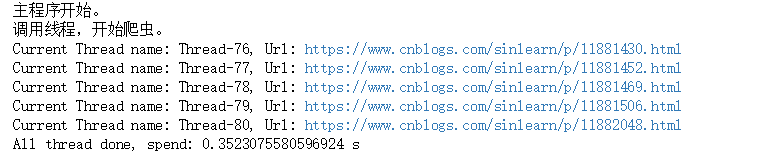